In [1]:
import os
import cv2
import numpy as np
import time
from fitter import Fitter

def getavgstd(image):
    avg = []
    std = []
    image_avg_l = np.mean(image[:, :, 0])
    image_std_l = np.std(image[:, :, 0])
    image_avg_a = np.mean(image[:, :, 1])
    image_std_a = np.std(image[:, :, 1])
    image_avg_b = np.mean(image[:, :, 2])
    image_std_b = np.std(image[:, :, 2])
    avg.append(image_avg_l)
    avg.append(image_avg_a)
    avg.append(image_avg_b)
    std.append(image_std_l)
    std.append(image_std_a)
    std.append(image_std_b)
    return (avg, std)


path_dataset = '/root/autodl-tmp/BACH/standard/train'

# path_

labL_avg_List = []
labA_avg_List = []
labB_avg_List = []
labL_std_List = []
labA_std_List = []
labB_std_List = []

t1 = time.time()
for class_dir in os.listdir(path_dataset):
    path_class = os.path.join(path_dataset,class_dir)
    print(path_class)
    for image in os.listdir(path_class):
        path_img = os.path.join(path_class,image)
        img = cv2.imread(path_img)
        # print(img) #None
        try:
            img = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
            img_avg, img_std = getavgstd(img)
        except:
            continue
            print(path_img)
        labL_avg_List.append(img_avg[0])
        labA_avg_List.append(img_avg[1])
        labB_avg_List.append(img_avg[2])
        labL_std_List.append(img_std[0])
        labA_std_List.append(img_std[1])
        labB_std_List.append(img_std[2])

t2 = time.time()
print(t2-t1)
#     break

/root/autodl-tmp/BACH/standard/train/Benign
/root/autodl-tmp/BACH/standard/train/Invasive
/root/autodl-tmp/BACH/standard/train/Normal
/root/autodl-tmp/BACH/standard/train/InSitu
259.88768672943115


{'laplace': {'loc': 171.55023384094238, 'scale': 12.489731549762544}}

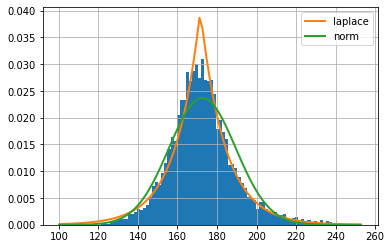

In [2]:
f = Fitter(labL_avg_List, distributions=['norm', 'laplace'])
f.fit()
f.summary()
f.get_best(method='sumsquare_error')

In [6]:
x = f.get_best(method='sumsquare_error').keys()

In [8]:
print(list(x)[0])

laplace


{'laplace': {'loc': 35.657077776630615, 'scale': 7.310442612141829}}

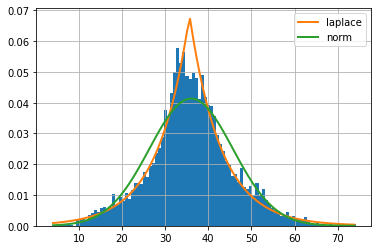

In [11]:
f = Fitter(labL_std_List, distributions=['norm','laplace'])
f.fit()
f.summary()
f.get_best(method='sumsquare_error')

{'norm': {'loc': 150.20892475400652, 'scale': 9.01960314794333}}

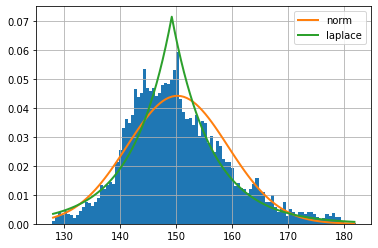

In [12]:
f = Fitter(labA_avg_List, distributions=['norm', 'laplace'])
f.fit()
f.summary()
f.get_best(method='sumsquare_error')

{'norm': {'loc': 9.677586138729282, 'scale': 2.904876744062406}}

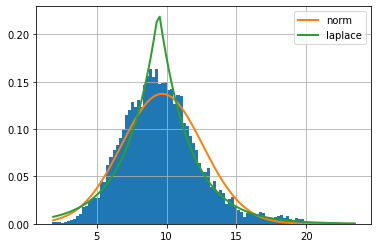

In [13]:
f = Fitter(labA_std_List, distributions=['norm', 'laplace'])
f.fit()
f.summary()
f.get_best(method='sumsquare_error')

{'norm': {'loc': 101.01363152049836, 'scale': 9.533642852257662}}

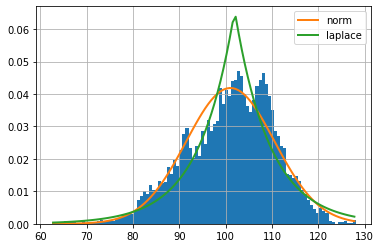

In [14]:
f = Fitter(labB_avg_List, distributions=['norm','laplace'])
f.fit()
f.summary()
f.get_best(method='sumsquare_error')

{'laplace': {'loc': 10.625625151279774, 'scale': 2.7304367411610353}}

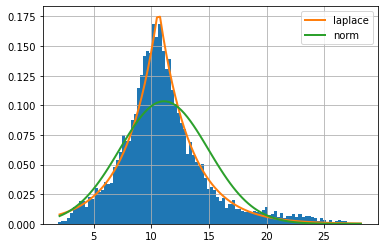

In [15]:
f = Fitter(labB_std_List, distributions=['norm', 'laplace'])
f.fit()
f.summary()
f.get_best(method='sumsquare_error')